In [7]:
import torch
import torch.nn.functional as F
import numpy as np
import pandas as pd

In [16]:
# Easy to comprehent numerical values
torch.set_printoptions(precision=4, sci_mode=False)

## Multinomial logistic regression


Works with an arbitrary number of classes. In machine learning and deep learning contexts, this multinomial logistic regression model is commonly called softmax regression.  


To obtain the class label from the softmax probabilities, we apply the argmax function to select the index of the highest score.  


Suppose you have 2 training examples in a 3-class classification setting. What is the cross-entropy loss for a perfectly random prediction?  
> 1.1 - A perfectly random prediction yields a probability score of 1/3 in a 3-class setting. Then we have -log(1/3) = 1.10. Note that this is independent of the number of training examples, since we average: -(log(1/3) + log(1/3)) / 2 = 1.10

In [ ]:
class SoftmaxRegression(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super(SoftmaxRegression, self).__init__()
        self.linear = torch.nn.Linear(num_features, num_classes)

    def forward(self, x):
        logits = self.linear(x)
        probs = F.softmax(logits, dim=1)
        return logits, probs

In [5]:
z = torch.tensor([[3.1, -2.3, 5.8],
                  [1.1, 1.9, -8.9]])

In [8]:
sm = F.softmax(z, dim=1)
sm

tensor([[    0.06,     0.00,     0.94],
        [    0.31,     0.69,     0.00]])

In [9]:
torch.argmax(sm, dim=1)

tensor([2, 1])

In [11]:
# Cross-Entropy
'''
Why need?
> need to compute derivatives of the loss w.r.t to the weights, then update the weights
> loss - get the estimate of how wrong the model is in its predictions
> use it to compute the gradients, update the weights to make better predictions
'''

'\nWhy need?\n> need to compute derivatives of the loss w.r.t to the weights, then update the weights\n> loss - get the estimate of how wrong the model is in its predictions\n> use it to compute the gradients, update the weights to make better predictions\n'

In [12]:
y = torch.tensor([0, 2, 2, 1])
y_onehot = F.one_hot(y)
y_onehot

tensor([[1, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0]])

In [13]:
net_inputs = torch.tensor([[1.5, 0.1, -0.4],
                           [0.5, 0.7, 2.1],
                           [-2.1, 1.1, 0.8],
                           [1.1, 2.5, -1.2]])

In [17]:
activations = torch.softmax(net_inputs, dim=1)
activations

tensor([[0.7162, 0.1766, 0.1071],
        [0.1394, 0.1702, 0.6904],
        [0.0229, 0.5613, 0.4158],
        [0.1940, 0.7866, 0.0194]])

In [18]:
def manual_cross_entropy(net_inputs, y):
    activations = torch.softmax(net_inputs, dim=1)
    y_onehot = F.one_hot(y)

    train_losses = - torch.sum(torch.log(activations) * (y_onehot), dim=1)
    avg_loss = torch.mean(train_losses)
    return avg_loss

In [19]:
manual_cross_entropy(net_inputs, y)

tensor(0.4555)

In [23]:
F.cross_entropy(net_inputs, y)

tensor(0.4555)

> We do not need the one-hot encoding step because PyTorch takes care of this for us internally!

> The cross entropy function itself takes care of the one-hot encoding and the softmax activations.

In [33]:
y_onehot.to(torch.float32)
y_onehot

tensor([[1, 0, 0],
        [0, 0, 1],
        [0, 0, 1],
        [0, 1, 0]])

In [35]:
# the error
# F.cross_entropy(net_inputs, y_onehot)

## Multilayer Neural Nets

In [ ]:
'''
Softmax regression handles multiple classes, but limitation - linear boundaries.
-> Add hidden layers --> Multilayer Perceptron

Multilayer Perceptron  
- can generate complex boundaries
- limitation - needs more data and tuning to perform well

BEST PRACTICE: Logistic Regression / Softmax Regression is a great baseline to start with. 
Baseline - use a simpler model to get a predictive performance 
    and then with a more sophisticated model try to improve the performance.

Multilayer Perceptron - fully-connected feedforward NN.
'''

'\nSoftmax regression handles multiple classes, but limitation - linear boundaries.\n-> Add hidden layers --> Multilayer Perceptron\n\nMultilayer Perceptron  \n- can generate complex boundaries\n- limitation - needs more data and tuning to perform well\n\nBEST PRACTICE: Logistic Regression / Softmax Regression is a great baseline to start with. \nBaseline - use a simpler model to get a predictive performance \n    and then with a more sophisticated model try to improve the performance.\n\nMultilayer Perceptron - fully-connected feedforward NN.\n'

### Basic Architecture Design Considerations


1) Need non-linear actication function? - Yes, otherwise MLP - linear classifier (can not create non-linear decision boundaries anymore). Combination of linear functions - still a linear function.  

Without nonlinear activation functions, the model is a generalized linear model that can’t learn nonlinear decision boundaries.  

2) Deep vs Wide   
width refers to the number of hidden units in the hidden layers. And depth refers to the number of layers.  

Wide and shallow **vs** Narrow and deep  

Wide and shallow:
- in theory, a sufficiently wide MLP with 1 hidden layer can approximate an arbitrary function (given enough training data)  
- needs lots of hidden units  
- prone to memorization/overfitting (vs learning)  


Narrow and deep:
- needs fewer units (nods) in total to have the same expressivity as wide & shallow
- generalizes better (abstract features, see CNN)  
- vanishing/exploding gradient problems 
- harder to train

3) Initialize the weights

init to zeros()? --> all the columns in the weight matrix will be the same --> all hidden nodes will have and keep the same value --> Same as a model with a hidden node (multiplied by a scalar)  

> init the weights to small random numbers --> break the symmetry --> all hidden units have different values 

Which weight initialization function should be used depends on the activation function. For example, a common choice for ReLU activations is kaiming initialization.

## Training a MLP (XOR)

In [ ]:
## Loading the dataset
df = pd.read_csv("xor.csv")
df

,x1,x2,class label
0,0.781306,1.062984,0
1,-1.060524,-1.095550,0
2,0.632125,0.674028,0
3,-1.424712,0.535203,1
4,1.383161,1.368510,0
...,...,...,...
745,0.792484,0.839275,0
746,0.582466,-0.749250,1
747,-1.593475,0.671721,1
748,-0.812671,-0.268542,0


In [ ]:
X = df[["x1", "x2"]].values
y = df["class label"].values

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.15, random_state=1, stratify=y)

X_train, X_val, y_train, y_val = train_test_split(
        X_train, y_train, test_size=0.1, random_state=1, stratify=y_train)

In [ ]:
print("Training size:", X_train.shape)
print("Validation size :", X_val.shape)
print("Test size: ", X_test.shape)

Training size: (573, 2)
Validation size : (64, 2)
Test size:  (113, 2)


In [ ]:
import numpy as np

print("Training labels:", np.bincount(y_train))
print("Validation labels:", np.bincount(y_val))
print("Test labels:", np.bincount(y_test))

Training labels: [287 286]
Validation labels: [32 32]
Test labels: [57 56]


In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt

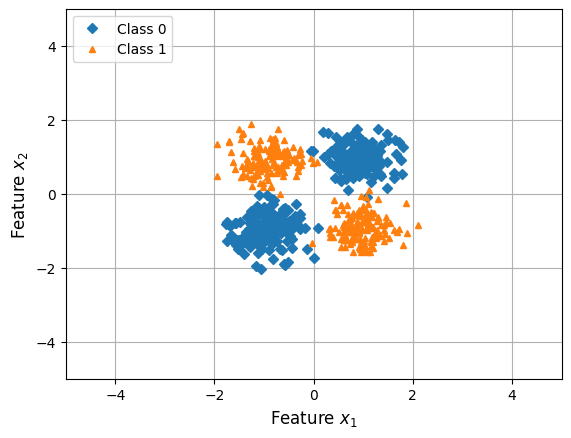

In [ ]:
plt.plot(
    X_train[y_train == 0, 0],
    X_train[y_train == 0, 1],
    marker="D",
    markersize=5,
    linestyle="",
    label="Class 0",
)

plt.plot(
    X_train[y_train == 1, 0],
    X_train[y_train == 1, 1],
    marker="^",
    markersize=5,
    linestyle="",
    label="Class 1",
)

plt.legend(loc=2)

plt.xlim([-5, 5])
plt.ylim([-5, 5])

plt.xlabel("Feature $x_1$", fontsize=12)
plt.ylabel("Feature $x_2$", fontsize=12)

plt.grid()
plt.show()

### Implementing the model

In [ ]:
class PyTorchMLP(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()

        self.all_layers = torch.nn.Sequential(
                
            # 1st hidden layer
            torch.nn.Linear(num_features, 25),
            torch.nn.ReLU(),

            # 2nd hidden layer
            torch.nn.Linear(25, 15),
            torch.nn.ReLU(),

            # output layer
            torch.nn.Linear(15, num_classes),
        )

    def forward(self, x):
        logits = self.all_layers(x)
        return logits

### Define DataLoaders

In [ ]:
from torch.utils.data import Dataset, DataLoader


class MyDataset(Dataset):
    def __init__(self, X, y):

        self.features = torch.tensor(X, dtype=torch.float32)
        self.labels = torch.tensor(y, dtype=torch.int64)

    def __getitem__(self, index):
        x = self.features[index]
        y = self.labels[index]        
        return x, y

    def __len__(self):
        return self.labels.shape[0]

In [ ]:
train_ds = MyDataset(X_train, y_train)
val_ds = MyDataset(X_val, y_val)
test_ds = MyDataset(X_test, y_test)

train_loader = DataLoader(
    dataset=train_ds,
    batch_size=32,
    shuffle=True,
)

val_loader = DataLoader(
    dataset=val_ds,
    batch_size=32,
    shuffle=False,
)

test_loader = DataLoader(
    dataset=test_ds,
    batch_size=32,
    shuffle=False,
)

### Training Loop

In [ ]:
def compute_accuracy(model, dataloader):

    model = model.eval()
    
    correct = 0.0
    total_examples = 0
    
    for idx, (features, labels) in enumerate(dataloader):
        
        with torch.inference_mode(): # basically the same as torch.no_grad
            logits = model(features)
        
        predictions = torch.argmax(logits, dim=1)

        compare = labels == predictions
        correct += torch.sum(compare)
        total_examples += len(compare)

    return correct / total_examples

In [ ]:
import torch.nn.functional as F


torch.manual_seed(1)
model = PyTorchMLP(num_features=2, num_classes=2)
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) # Stochastic gradient descent

num_epochs = 10

for epoch in range(num_epochs):
    
    model = model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):

        logits = model(features)
        
        loss = F.cross_entropy(logits, labels) # Loss function
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
    
        ### LOGGING
        print(f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
              f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
              f" | Train/Val Loss: {loss:.2f}")
    
    train_acc = compute_accuracy(model, train_loader)
    val_acc = compute_accuracy(model, val_loader)
    print(f"Train Acc {train_acc*100:.2f}% | Val Acc {val_acc*100:.2f}%")

Epoch: 001/010 | Batch 000/018 | Train/Val Loss: 0.68
Epoch: 001/010 | Batch 001/018 | Train/Val Loss: 0.69
Epoch: 001/010 | Batch 002/018 | Train/Val Loss: 0.68
Epoch: 001/010 | Batch 003/018 | Train/Val Loss: 0.67
Epoch: 001/010 | Batch 004/018 | Train/Val Loss: 0.69
Epoch: 001/010 | Batch 005/018 | Train/Val Loss: 0.68
Epoch: 001/010 | Batch 006/018 | Train/Val Loss: 0.66
Epoch: 001/010 | Batch 007/018 | Train/Val Loss: 0.68
Epoch: 001/010 | Batch 008/018 | Train/Val Loss: 0.67
Epoch: 001/010 | Batch 009/018 | Train/Val Loss: 0.68
Epoch: 001/010 | Batch 010/018 | Train/Val Loss: 0.66
Epoch: 001/010 | Batch 011/018 | Train/Val Loss: 0.65
Epoch: 001/010 | Batch 012/018 | Train/Val Loss: 0.67
Epoch: 001/010 | Batch 013/018 | Train/Val Loss: 0.67
Epoch: 001/010 | Batch 014/018 | Train/Val Loss: 0.65
Epoch: 001/010 | Batch 015/018 | Train/Val Loss: 0.67
Epoch: 001/010 | Batch 016/018 | Train/Val Loss: 0.67
Epoch: 001/010 | Batch 017/018 | Train/Val Loss: 0.65
Train Acc 68.41% | Val Acc 6

### Evaluating Results

In [ ]:
train_acc = compute_accuracy(model, train_loader)
val_acc = compute_accuracy(model, val_loader)
test_acc = compute_accuracy(model, test_loader)

print(f"Train Acc {train_acc*100:.2f}%")
print(f"Val Acc {val_acc*100:.2f}%")
print(f"Test Acc {test_acc*100:.2f}%")

Train Acc 98.25%
Val Acc 100.00%
Test Acc 99.12%


### Visualizing decision boundary in 2D space

In [ ]:
from matplotlib.colors import ListedColormap
import numpy as np


def plot_decision_regions(X, y, classifier, resolution=0.02):

    # setup marker generator and color map
    markers = ('D', '^', 'x', 's', 'v')
    colors = ('C0', 'C1', 'C2', 'C3', 'C4')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    tensor = torch.tensor(np.array([xx1.ravel(), xx2.ravel()]).T).float()
    logits = classifier.forward(tensor)
    Z = np.argmax(logits.detach().numpy(), axis=1)

    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.4, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], y=X[y == cl, 1],
                    alpha=0.8, color=cmap(idx),
                    #edgecolor='black',
                    marker=markers[idx], 
                    label=cl)

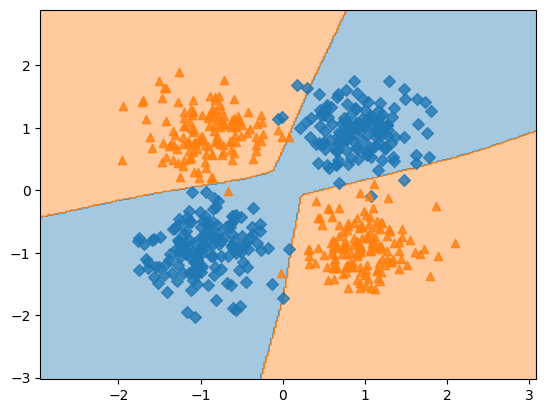

In [ ]:
plot_decision_regions(X_train, y_train, classifier=model)

## Training a MLP (MNIST)

In [ ]:
# loading the dataset

from torch.utils.data import DataLoader
from torchvision import datasets, transforms

train_dataset = datasets.MNIST(
    root="./mnist", train=True, transform=transforms.ToTensor(), download=True
)

test_dataset = datasets.MNIST(
    root="./mnist", train=False, transform=transforms.ToTensor()
)

100%|██████████| 9912422/9912422 [00:00<00:00, 73638636.19it/s]


Extracting ./mnist/MNIST/raw/train-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 54516513.87it/s]


Extracting ./mnist/MNIST/raw/train-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 21440103.78it/s]


Extracting ./mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to ./mnist/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 12274825.24it/s]


Extracting ./mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./mnist/MNIST/raw



In [ ]:
len(train_dataset)

60000

In [ ]:
len(test_dataset)


10000

In [ ]:
# create a validation split
from torch.utils.data.dataset import random_split

torch.manual_seed(1)
train_dataset, val_dataset = random_split(train_dataset, lengths=[55000, 5000])

In [ ]:
train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=64,
    shuffle=True,
)

val_loader = DataLoader(
    dataset=val_dataset,
    batch_size=64,
    shuffle=False,
)

test_loader = DataLoader(
    dataset=test_dataset,
    batch_size=64,
    shuffle=False,
)

In [ ]:
# Check a label distribution
from collections import Counter

train_counter = Counter()
for images, labels in train_loader:
    train_counter.update(labels.tolist())
    
print("\nTraining label distribution:")
print(sorted(train_counter.items()))

    
val_counter = Counter()
for images, labels in val_loader:
    val_counter.update(labels.tolist())
    
print("\nValidation label distribution:")
print(sorted(val_counter.items()))
    

test_counter = Counter()
for images, labels in test_loader:
    test_counter.update(labels.tolist())

print("\nTest label distribution:")
print(sorted(test_counter.items()))


Training label distribution:
[(0, 5419), (1, 6185), (2, 5477), (3, 5681), (4, 5349), (5, 4974), (6, 5422), (7, 5710), (8, 5351), (9, 5432)]

Validation label distribution:
[(0, 504), (1, 557), (2, 481), (3, 450), (4, 493), (5, 447), (6, 496), (7, 555), (8, 500), (9, 517)]

Test label distribution:
[(0, 980), (1, 1135), (2, 1032), (3, 1010), (4, 982), (5, 892), (6, 958), (7, 1028), (8, 974), (9, 1009)]


### Zero-rule baseline (majority class classifier)

In [ ]:
majority_class = test_counter.most_common(1)[0]
print("Majority class:", majority_class[0])

baseline_acc = majority_class[1] / sum(test_counter.values())
print("Accuracy when always predicting the majority class:")
print(f"{baseline_acc:.2f} ({baseline_acc*100:.2f}%)")

Majority class: 1
Accuracy when always predicting the majority class:
0.11 (11.35%)


### Visualize data

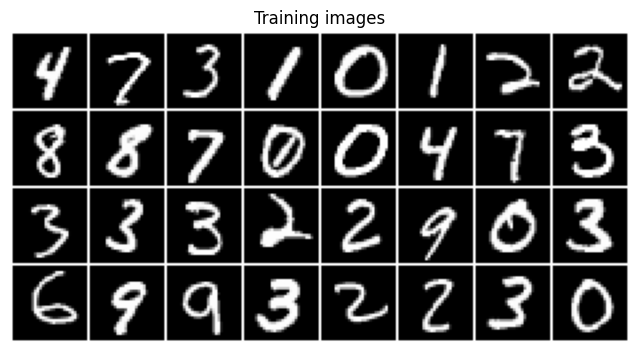

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import torchvision


for images, labels in train_loader:  
    break

plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training images")
plt.imshow(np.transpose(torchvision.utils.make_grid(
    images[:32], 
    padding=1,
    pad_value=1.0,
    normalize=True),
    (1, 2, 0)))
plt.show()

In [ ]:
images.shape # batchsize, channel, height, width

torch.Size([64, 1, 28, 28])

In [ ]:
torch.flatten(images, start_dim=1).shape # batchsize, features

torch.Size([64, 784])

### Implementing a model

In [ ]:
class PyTorchMLP(torch.nn.Module):
    def __init__(self, num_features, num_classes):
        super().__init__()

        self.all_layers = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Linear(num_features, 50),
            torch.nn.ReLU(),
            # 2nd hidden layer
            torch.nn.Linear(50, 25),
            torch.nn.ReLU(),
            # output layer
            torch.nn.Linear(25, num_classes),
        )

    def forward(self, x):
        x = torch.flatten(x, start_dim=1)
        logits = self.all_layers(x)
        return logits

In [ ]:
import torch.nn.functional as F

model = PyTorchMLP(num_features=784, num_classes=10)

optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

num_epochs = 10

loss_list = []
train_acc_list, val_acc_list = [], []
for epoch in range(num_epochs):

    model = model.train()
    for batch_idx, (features, labels) in enumerate(train_loader):

        logits = model(features)

        loss = F.cross_entropy(logits, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if not batch_idx % 250:
            ### LOGGING
            print(
                f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
                f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
                f" | Train Loss: {loss:.2f}"
            )
        loss_list.append(loss.item())

    train_acc = compute_accuracy(model, train_loader)
    val_acc = compute_accuracy(model, val_loader)
    print(f"Train Acc {train_acc*100:.2f}% | Val Acc {val_acc*100:.2f}%")
    train_acc_list.append(train_acc)
    val_acc_list.append(val_acc)

Epoch: 001/010 | Batch 000/860 | Train Loss: 2.31
Epoch: 001/010 | Batch 250/860 | Train Loss: 0.60
Epoch: 001/010 | Batch 500/860 | Train Loss: 0.30
Epoch: 001/010 | Batch 750/860 | Train Loss: 0.39
Train Acc 89.87% | Val Acc 89.96%
Epoch: 002/010 | Batch 000/860 | Train Loss: 0.47
Epoch: 002/010 | Batch 250/860 | Train Loss: 0.19
Epoch: 002/010 | Batch 500/860 | Train Loss: 0.17
Epoch: 002/010 | Batch 750/860 | Train Loss: 0.41
Train Acc 92.54% | Val Acc 91.84%
Epoch: 003/010 | Batch 000/860 | Train Loss: 0.28
Epoch: 003/010 | Batch 250/860 | Train Loss: 0.18
Epoch: 003/010 | Batch 500/860 | Train Loss: 0.23
Epoch: 003/010 | Batch 750/860 | Train Loss: 0.12
Train Acc 93.84% | Val Acc 93.46%
Epoch: 004/010 | Batch 000/860 | Train Loss: 0.17
Epoch: 004/010 | Batch 250/860 | Train Loss: 0.24
Epoch: 004/010 | Batch 500/860 | Train Loss: 0.12
Epoch: 004/010 | Batch 750/860 | Train Loss: 0.13
Train Acc 94.53% | Val Acc 93.60%
Epoch: 005/010 | Batch 000/860 | Train Loss: 0.25
Epoch: 005/010

### Evaluating results

In [ ]:
train_acc = compute_accuracy(model, train_loader)
val_acc = compute_accuracy(model, val_loader)
test_acc = compute_accuracy(model, test_loader)

print(f"Train Acc {train_acc*100:.2f}%")
print(f"Val Acc {val_acc*100:.2f}%")
print(f"Test Acc {test_acc*100:.2f}%")

Train Acc 97.64%
Val Acc 96.32%
Test Acc 96.85%


In [ ]:
def plot_training_loss(
    minibatch_loss_list,
    num_epochs,
    iter_per_epoch,
    results_dir=None,
    averaging_iterations=100,
):

    plt.figure()
    ax1 = plt.subplot(1, 1, 1)
    ax1.plot(
        range(len(minibatch_loss_list)), (minibatch_loss_list), label="Minibatch Loss"
    )

    if len(minibatch_loss_list) > 1000:
        ax1.set_ylim([0, np.max(minibatch_loss_list[1000:]) * 1.5])
    ax1.set_xlabel("Iterations")
    ax1.set_ylabel("Loss")

    ax1.plot(
        np.convolve(
            minibatch_loss_list,
            np.ones(
                averaging_iterations,
            )
            / averaging_iterations,
            mode="valid",
        ),
        label="Running Average",
    )
    ax1.legend()

    ###################
    # Set scond x-axis
    ax2 = ax1.twiny()
    newlabel = list(range(num_epochs + 1))

    newpos = [e * iter_per_epoch for e in newlabel]

    ax2.set_xticks(newpos[::10])
    ax2.set_xticklabels(newlabel[::10])

    ax2.xaxis.set_ticks_position("bottom")
    ax2.xaxis.set_label_position("bottom")
    ax2.spines["bottom"].set_position(("outward", 45))
    ax2.set_xlabel("Epochs")
    ax2.set_xlim(ax1.get_xlim())
    ###################

    plt.tight_layout()

    if results_dir is not None:
        image_path = os.path.join(results_dir, "plot_training_loss.pdf")
        plt.savefig(image_path)

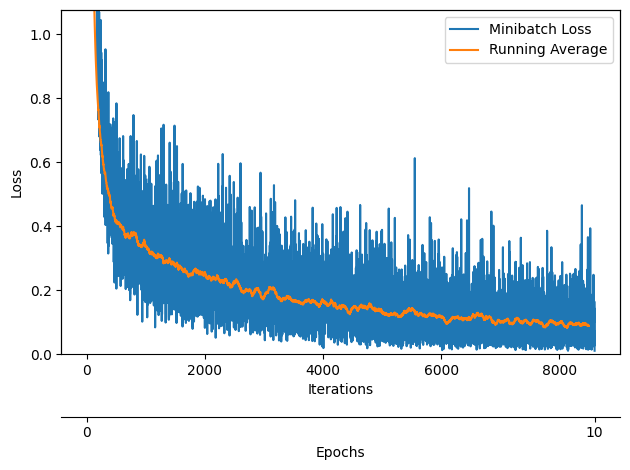

In [ ]:
plot_training_loss(minibatch_loss_list=loss_list,
                   num_epochs=num_epochs,
                   iter_per_epoch=len(loss_list)//num_epochs)

In [ ]:
def plot_accuracy(train_acc_list, valid_acc_list, results_dir=None):

    num_epochs = len(train_acc_list)

    plt.plot(np.arange(1, num_epochs + 1), train_acc_list, label="Training")
    plt.plot(np.arange(1, num_epochs + 1), valid_acc_list, label="Validation")

    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.legend()

    plt.tight_layout()

    if results_dir is not None:
        image_path = os.path.join(results_dir, "plot_acc_training_validation.pdf")
        plt.savefig(image_path)

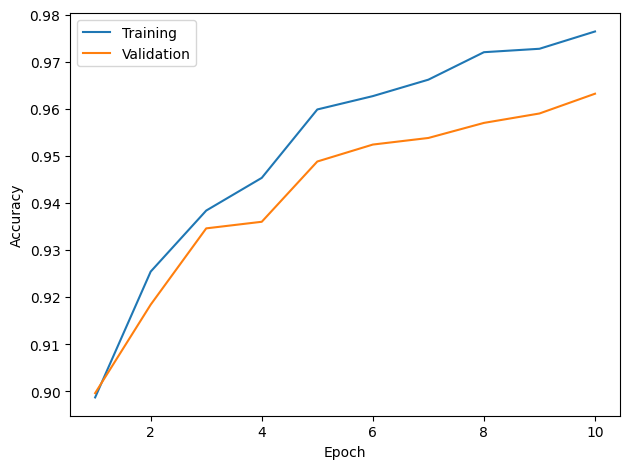

In [ ]:
plot_accuracy(train_acc_list=train_acc_list, valid_acc_list=val_acc_list)

### Inspecting failure cases

In [ ]:
def show_examples(model, data_loader, unnormalizer=None, class_dict=None):

    fail_features, fail_targets, fail_predicted = [], [], []
    for batch_idx, (features, targets) in enumerate(data_loader):

        with torch.no_grad():
            logits = model(features)
            predictions = torch.argmax(logits, dim=1)

            mask = targets != predictions

            fail_features.extend(features[mask])
            fail_targets.extend(targets[mask])
            fail_predicted.extend(predictions[mask])

        if len(fail_targets) > 15:
            break

    fail_features = torch.cat(fail_features)
    fail_targets = torch.tensor(fail_targets)
    fail_predicted = torch.tensor(fail_predicted)

    fig, axes = plt.subplots(nrows=3, ncols=5, sharex=True, sharey=True)

    if unnormalizer is not None:
        for idx in range(fail_features.shape[0]):
            features[idx] = unnormalizer(fail_features[idx])

    if fail_features.ndim == 4:
        nhwc_img = np.transpose(fail_features, axes=(0, 2, 3, 1))
        nhw_img = np.squeeze(nhwc_img.numpy(), axis=3)

        for idx, ax in enumerate(axes.ravel()):
            ax.imshow(nhw_img[idx], cmap="binary")
            if class_dict is not None:
                ax.title.set_text(
                    f"P: {class_dict[fail_predicted[idx].item()]}"
                    f"\nT: {class_dict[fail_targets[idx].item()]}"
                )
            else:
                ax.title.set_text(f"P: {fail_predicted[idx]} | T: {fail_targets[idx]}")
            ax.axison = False

    else:

        for idx, ax in enumerate(axes.ravel()):
            ax.imshow(fail_features[idx], cmap="binary")
            if class_dict is not None:
                ax.title.set_text(
                    f"P: {class_dict[fail_predicted[idx].item()]}"
                    f"\nT: {class_dict[fail_targets[idx].item()]}"
                )
            else:
                ax.title.set_text(f"P: {fail_predicted[idx]} | T: {targets[idx]}")
            ax.axison = False
    plt.tight_layout()
    plt.show()

In [ ]:
class_dict = {0: 'digit 0',
              1: 'digit 1',
              2: 'digit 2',
              3: 'digit 3',
              4: 'digit 4',
              5: 'digit 5',
              6: 'digit 6',
              7: 'digit 7',
              8: 'digit 8',
              9: 'digit 9'}

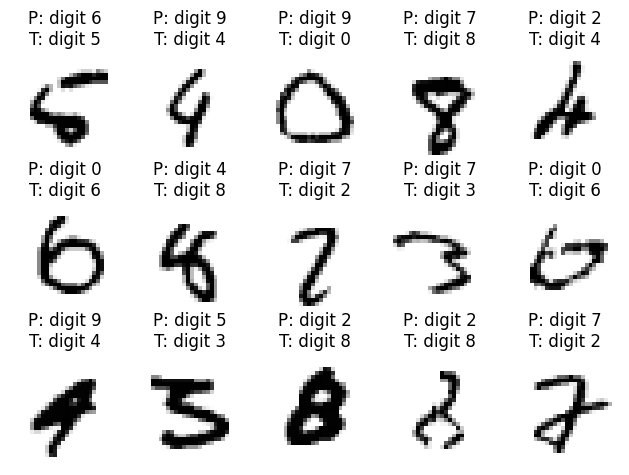

In [ ]:
show_examples(
    model=model, data_loader=test_loader, class_dict=class_dict
)

## Multilayer Neural Networks for Regression

We can use deep neural networks for regression, too! We can turn a multilayer perceptron classifier into a regression model with only two minor changes:
- Removing the logistic sigmoid / softmax activation function from the output layer. One output node for continuous value.
- swapping the cross entropy loss with the mean squared error loss.

If you plan to implement neural networks for regression, also consider using the R-squared coefficient as an evaluation metric. The R2 score is available in TorchMetrics.

In [47]:
logits = torch.tensor([1.23, 0.51, -2.5])
true_label = torch.tensor([-1.0, 0.55, -1.2])

F.mse_loss(logits, true_label)

tensor(2.2215)

In [36]:
# Toy Dataset

X_train = torch.tensor(
    [258.0, 270.0, 294.0, 320.0, 342.0, 368.0, 396.0, 446.0, 480.0, 586.0]
).view(-1, 1)

y_train = torch.tensor(
    [236.4, 234.4, 252.8, 298.6, 314.2, 342.2, 360.8, 368.0, 391.2, 390.8]
)

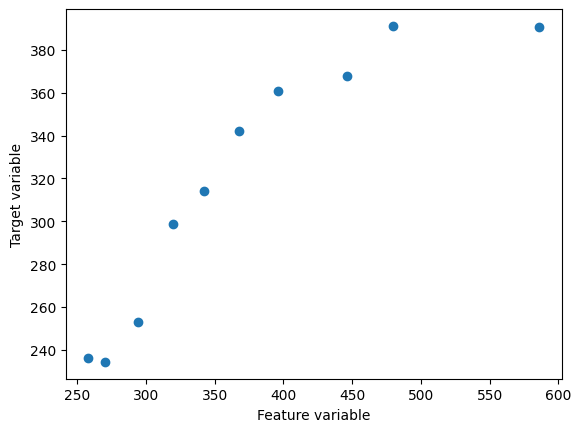

In [37]:
import matplotlib.pyplot as plt

plt.scatter(X_train, y_train)
plt.xlabel("Feature variable")
plt.ylabel("Target variable")
plt.show()

In [39]:
# Normalize data
x_mean, x_std = X_train.mean(), X_train.std()
y_mean, y_std = y_train.mean(), y_train.std()

X_train_norm = (X_train - x_mean) / x_std
y_train_norm = (y_train - y_mean) / y_std

### Implement Regression MLP

In [38]:
class RegressionMLP(torch.nn.Module):
    def __init__(self, num_features):
        super().__init__()

        self.all_layers = torch.nn.Sequential(
            # 1st hidden layer
            torch.nn.Linear(num_features, 50),
            torch.nn.ReLU(),
            # 2nd hidden layer
            torch.nn.Linear(50, 25),
            torch.nn.ReLU(),
            # output layer
            torch.nn.Linear(25, 1), ## Only 1 output unit
        )

    def forward(self, x):
        logits = self.all_layers(x).flatten()
        return logits

In [40]:
# Set up DataLoader

from torch.utils.data import DataLoader, Dataset

class MyDataset(Dataset):
    def __init__(self, X, y):
        self.features = X
        self.targets = y

    def __getitem__(self, index):
        x = self.features[index]
        y = self.targets[index]
        return x, y

    def __len__(self):
        return self.targets.shape[0]


train_ds = MyDataset(X_train_norm, y_train_norm)

train_loader = DataLoader(
    dataset=train_ds,
    batch_size=20,
    shuffle=True,
)

### Train MLP model for regression

In [41]:
model = RegressionMLP(num_features=1)
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

In [42]:
num_epochs = 30

In [43]:
# Mostly identical code as for classification (but mse_loss)

loss_list = []
train_acc_list, val_acc_list = [], []

for epoch in range(num_epochs):

    model = model.train()
    for batch_idx, (features, targets) in enumerate(train_loader):

        logits = model(features)
        loss = F.mse_loss(logits, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if not batch_idx % 250:
            ### LOGGING
            print(
                f"Epoch: {epoch+1:03d}/{num_epochs:03d}"
                f" | Batch {batch_idx:03d}/{len(train_loader):03d}"
                f" | Train Loss: {loss:.2f}"
            )
        loss_list.append(loss.item())

Epoch: 001/030 | Batch 000/001 | Train Loss: 0.94
Epoch: 002/030 | Batch 000/001 | Train Loss: 0.55
Epoch: 003/030 | Batch 000/001 | Train Loss: 0.34
Epoch: 004/030 | Batch 000/001 | Train Loss: 0.20
Epoch: 005/030 | Batch 000/001 | Train Loss: 0.12
Epoch: 006/030 | Batch 000/001 | Train Loss: 0.09
Epoch: 007/030 | Batch 000/001 | Train Loss: 0.08
Epoch: 008/030 | Batch 000/001 | Train Loss: 0.07
Epoch: 009/030 | Batch 000/001 | Train Loss: 0.06
Epoch: 010/030 | Batch 000/001 | Train Loss: 0.05
Epoch: 011/030 | Batch 000/001 | Train Loss: 0.04
Epoch: 012/030 | Batch 000/001 | Train Loss: 0.04
Epoch: 013/030 | Batch 000/001 | Train Loss: 0.03
Epoch: 014/030 | Batch 000/001 | Train Loss: 0.03
Epoch: 015/030 | Batch 000/001 | Train Loss: 0.03
Epoch: 016/030 | Batch 000/001 | Train Loss: 0.03
Epoch: 017/030 | Batch 000/001 | Train Loss: 0.02
Epoch: 018/030 | Batch 000/001 | Train Loss: 0.02
Epoch: 019/030 | Batch 000/001 | Train Loss: 0.02
Epoch: 020/030 | Batch 000/001 | Train Loss: 0.02


In [44]:
model.eval()

# Test data
X_range = torch.arange(150, 800, 0.1).view(-1, 1)

# Normalize by using training dataset mean/std
X_range_norm = (X_range - x_mean) / x_std

# predict
with torch.no_grad():
    y_mlp_norm = model(X_range_norm)

# MLP returns normalized predictions
# undo normalization of preditions for plotting
y_mlp = y_mlp_norm * y_std + y_mean

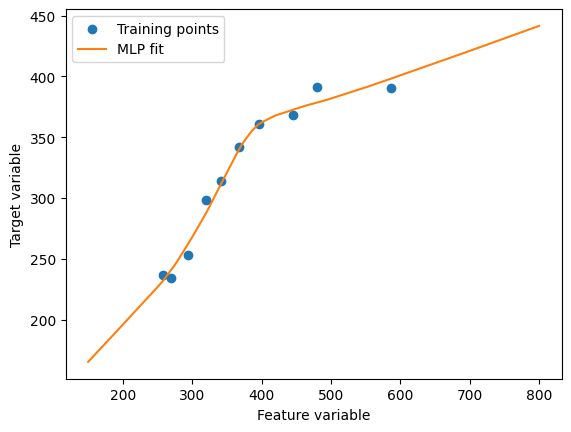

In [45]:
# plot results
plt.scatter(X_train, y_train, label="Training points")
plt.plot(X_range, y_mlp, color="C1", label="MLP fit", linestyle="-")


plt.xlabel("Feature variable")
plt.ylabel("Target variable")
plt.legend()
# plt.savefig("mlp.pdf")
plt.show()

## Speeding Up Model Training Using GPUs

Transfer tensors from the CPU to GPU memory to train neural networks more efficiently — GPUs are especially great for linear algebra operations that can be parallelized, for example, dot products and matrix multiplication.  


Move to the GPU memory in order to take advantage of GPU-accelerated training?

- features. We need to have the features on the GPU since we use them to compute the forward and backward pass.

- labels. It is necessary to have those in GPU memory if we compute the loss that also involves the predictions in GPU memory.

- model. The model weights need to be on the GPU for both the forward and the backward pass.

Tensors come with GPU support! 

**Key idea**: load the data and model into GPU memory for faster computing.

In [ ]:
# transfer from CPU memory to GPU memory
a.to('cuda')

# cuda - GPU computing library specifically for nvidia GPUs
# PyTorch supports nvidia, amd GPUs and apple silicon chips

Why GPUs are good for parallel computations (like matrix multiplications)?

- more memory bandwidth than CPU (e.g. 912 GB/s vs 45.8 GB/s)
- more computing cores (e.g. 10240 vs 32)
- floating-point calculations (34.10 TFLOPS vs 742 GFLOPS)

In [2]:
torch.cuda.is_available()

False

In [3]:
my_tensor = torch.tensor([1., 2., 3.])
my_tensor

tensor([1., 2., 3.])

In [ ]:
# Transfer to GPU memory
my_tensor = my_tensor.to('cuda')
my_tensor

In [ ]:
# Transfer to CPU memory
my_tensor = my_tensor.to('cpu')
my_tensor

In [ ]:
# Only minor code modifications requried to train a model on a GPU

model = MySuperModel(num_features=100, num_classes=10)
model.to('cuda')

for each epoch:
    for batch_idx, (features, labels) in enumerate(train_loader):

        features = features.to('cuda')
        labels = labels.to('cuda')

        logits = model(features)
        # the rest